## Shopify Data Science Challenge Winter 2019

### Question 1 - Brief Analysis
Provided here is a brief analysis of the answers to question 1. Please scroll below for a detailed analysis of these answers.

a) An AOV of \$3145.13 seems way off given the fact that the median of the data lies at \$284. After sorting the data by order_amount, we can see that the data is skewed by a few orders where the total_items are bulk orders. This is not representative of an average customer who would order in low quantities.Once we graph a histogram of this data, we can see that the data is right skewed. The data is affected by a few extreme outliers that is bringing the value of the AOV up by a significant amount. This is why the naive way of calculating AOV is ineffective given the data.

A better way to evaluate this data would be to remove the extreme outliers from our dataset, as these data points do not reflect the actions of an average user. One way to do this would be to calculate the Inter Quartile Range (IQR) of the dataset, and only consider data points that are within Q3 + (1.5 x IQR) and Q1 - (1.5 x IQR), where Q1 and Q3 are the first and third quartile respectively. Anything outside this rage is considered an outlier and ignored. We then take the mean of the remaining data points to calculate the AOV.

An alternate way to evaluate the data would be to simply use the median since it is less affected by outliers and skewed data in the dataset. This is because the median is just the center most point of the dataset, whereas the mean is greatly affected by extreme outliers as seen in this dataset.

b) (Ambiguous question since AOV is reported in dollar amounts. I assume that the question is asking for the names of the methods describes above)

Recommended Method:
Calculate mean of the remaining dataset after the elimination of Tukey Outliers

Alternate Method:
Use median value


c) After using the method described above to calculate the AOV, we arrive at the following values:

Recommended Method:
\$293.72

Alternate Method:
\$284.00

Using the method describes above, we get a AOV value of \$293.72. This is much more reasonable than the naive AOV value calculated before, and is much closer to the median of \$284. This value also captures the fact that some customers on Shopify stores order slightly larger quantities than the average customer, and thus the data is right skewed.

### Question 1 - Detailed Analysis

We first load in the data provided and take a peek into the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

orderDf = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
orderDf.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Lets look at a few metrics of the data to understand it better.

In [3]:
orderDf.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We can see that the median of the data is at \$284, which is much lower than the naive AOV value of \$3145.13. This means that the data is right skewed with extreme outliers bringing the value of the AOV up. Let us sort the data in descending order of order_amount to better understand what could be bringing the value of the AOV up.

In [13]:
sortedOrderDf = orderDf.sort_values(by='order_amount', ascending=False)
sortedOrderDf.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00


Here we see that the extremely high order_amount outliers are caused by bulk purchases that are not representative of an average customer who purchases shoes in low quantities. Let us view this data in a histogram to see the effect of these outleirs.

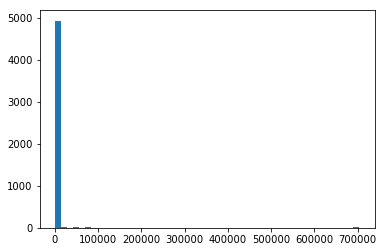

In [19]:
plt.hist(orderDf.order_amount, 50)
plt.show()

By graphing the data in a histogram with 50 buckets, we can see that most of the dataset is concentrated in 1 bucket, except the outliers which are much further away than our concentrated bucket. 

To better evaluate the AOV of the data, we can simply use the median of the dataset since it is less affected by outliers and the skeweness of the dataset, whereas the mean is greatly affected by extreme outliers as seen in this dataset.

However, I suggest using a different approach to evaluate the AOV of the dataset. Let us first start up displaying a boxplot of the dataset to better visualize how the data is effected by the outliers.

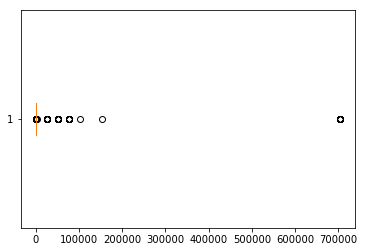

In [55]:
#sb.boxplot(data=orderDf.order_amount)
plt.boxplot(orderDf.order_amount, vert=False)
plt.show()

We can see that our box that contains 50% of the dataset is barely visible. This is because of the effects of the extreme outliers that make the dataset right skewed and bring the value of the AOV up.

The suggested way to better evaluate the AOV of the dataset would be to remove the extreme outliers from our dataset, as these data points do not reflect the actions of an average user. One way to do this would be to calculate the Inter Quartile Range (IQR) of the dataset, and only consider data points that are within Q3 + (1.5 x IQR) and Q1 - (1.5 x IQR), where Q1 and Q3 are the first and third quartile respectively. Anything outside this rage is considered an outlier and ignored. We then take the mean of the remaining data points to calculate the AOV.

Let us define a function to remove these outliers and display the remaining data points in a histogram.

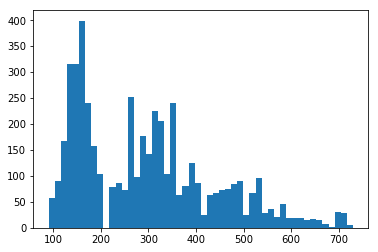

In [69]:
orderDf.order_amount.quantile(0.75)
orderDf.order_amount.quantile(0.25)
def remove_tukey_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lowerBound = q1 - (iqr * 1.5)
    upperBound = q3 + (iqr * 1.5)
    filteredData = [x for x in data if (lowerBound <= x <= upperBound)]
    return filteredData

filteredOrderAmount = remove_tukey_outliers(orderDf.order_amount)

plt.hist(filteredOrderAmount, 50)
plt.show()

Even though the data is still right skewed, we can see a better representation of the purchasing habits of an average customer. We see that the order_amount of most customers range between 120-360, with a few others ordering shoes in slightly larger quantities. This behaviour is to be expected of an average custoemr buying shoes.

Let us now use these remaining data points to calculate the AOV using the mean.

In [71]:
np.mean(filteredOrderAmount)

293.71537353364891

Using the method describes above, we get a AOV value of \$293.72. This is much more reasonable than the naive AOV value calculated before, and is much closer to the median of \$284. This value also captures the fact that some customers on Shopify stores order slightly larger quantities than the average customer, and thus the data is right skewed.

### Question 2 - Please see attached pdf.

a) How many orders were shipped by Speedy Express in total?

Query:

SELECT Count (*) FROM Orders <br>
INNER JOIN Shippers ON Orders.ShipperId = Shippers.ShipperId <br>
WHERE ShipperName = "Speedy Express";

Answer: 54

b) What is the last name of the employee with the most orders?

Query:

SELECT Employees.LastName <br>
FROM Orders <br>
INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID <br>
GROUP BY Orders.EmployeeID <br>
ORDER BY count(*) desc <br>
LIMIT 1;

Answer: Peacock

c) What product was ordered the most by customers in Germany?

Query:

SELECT ProductName <br>
FROM Orders <br>
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID <br>
INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID <br>
INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID <br>
WHERE Customers.Country = "Germany" <br>
GROUP BY OrderDetails.ProductID <br>
ORDER BY SUM(OrderDetails.Quantity) desc <br>
LIMIT 1;

Answer: Boston Crab Meat
